In [1]:
import pickle
import pandas as pd

import matplotlib.pyplot as plt
import glob
from natsort import natsorted #para ordenar alfabeticamente

In [2]:
folder = '/home/fernando.huaranca/datosmunin2/Thesis_Neuronal_Network/work/5-Salidas/31agosto_salidas'
Configs = glob.glob(folder+'/*/TrainConf.pkl')
Configs = natsorted(Configs)

#---
Stats = glob.glob(folder+'/*/ModelStats.pkl')
Stats = natsorted(Stats)

In [3]:
for stat in Stats:
    with open(stat,'rb') as file:
        data = pickle.load(file)
        print(data['RMSE'] )

[10.057238, 9.911098, 9.88873, 9.892468, 9.909354, 9.90859, 9.904012, 9.902377, 9.905708, 9.89881, 9.890039, 9.878313, 9.8682785, 9.860883, 9.855729, 9.851887, 9.848233, 9.844329, 9.841664, 9.839911, 9.839642, 9.839449, 9.839302, 9.839192, 9.839114, 9.83906, 9.839012, 9.838977, 9.838952, 9.838934, 9.838916, 9.838902, 9.838885, 9.838875, 9.838867, 9.838856, 9.8388405, 9.838839, 9.838828, 9.838824]
[10.500041, 9.849169, 9.9535885, 9.873183, 9.867776, 9.869567, 9.872969, 9.8743, 9.875106, 9.875501, 9.875684, 9.875781, 9.875811, 9.875834, 9.875848, 9.87585, 9.875852, 9.875852, 9.876116, 9.87598, 9.842052, 9.842137, 9.842196, 9.842228, 9.842242, 9.842255, 9.8422575, 9.842261, 9.842258, 9.842257, 9.842257, 9.842256, 9.842256, 9.842256, 9.842257, 9.842256, 9.842256, 9.842256, 9.842256, 9.842256]
[12.568781, 10.065974, 10.011877, 9.88891, 9.842725, 9.84194, 9.84178, 9.842088, 9.841985, 9.856184, 9.853162, 9.850116, 9.84731, 9.841865, 9.840283, 9.839551, 9.841452, 9.843867, 9.842622, 9.843821, 

In [22]:
hiper = 0.001

rmse_hiper = []
for conf,stat in zip(Configs,Stats):
    with open(conf,'rb') as file_conf:
            data_conf = pickle.load(file_conf)
            if data_conf['LearningRate'] == hiper:
                  with open(stat,'rb') as file_stat:
                        data_stat = pickle.load(file_stat)

                        rmse_hiper.append(data_stat['RMSE'])




                  
        




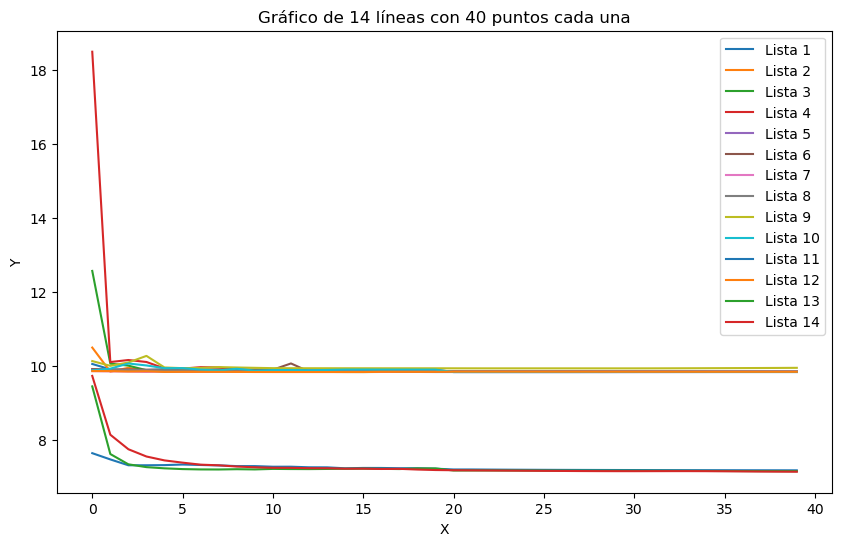

In [23]:
import matplotlib.pyplot as plt


# Crear el rango para el eje x
x = list(range(40))

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada lista
for i, lista in enumerate(rmse_hiper):
    plt.plot(x, lista, label=f'Lista {i+1}')

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título del gráfico
plt.title('Gráfico de 14 líneas con 40 puntos cada una')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


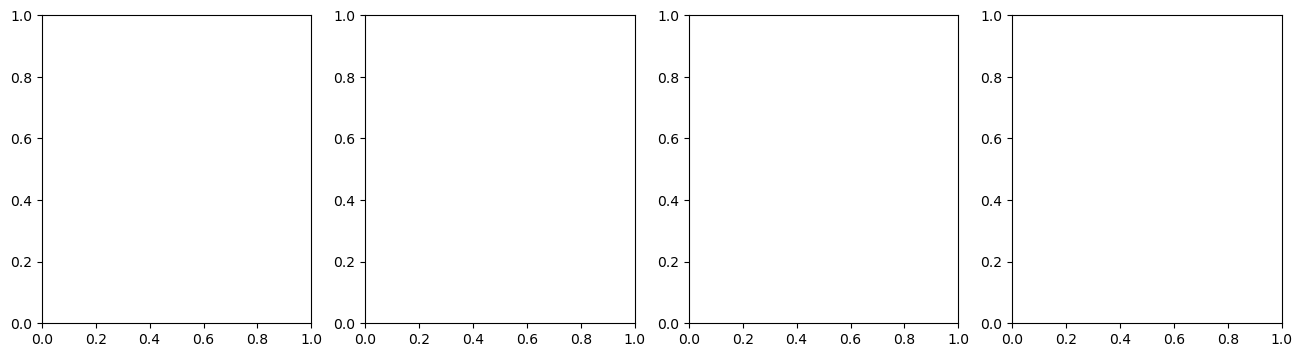

In [6]:
# Crear una figura con 4 columnas y 1 fila de subgráficos
fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # figsize ajusta el tamaño total de la figura


* Necesito todos los experimentos en los que solo difiera en learning rate

data

In [100]:
hiperparameters1 = ['BatchSize','LearningRate','WeightDecay']
hiperparameters2 = ['KernelSize','Pool','Bias','OutActivation','Channels']
hiperparameters3 = hiperparameters1 + hiperparameters2
hip_exp = {}


In [101]:
for conf in Configs:
    with open(conf,'rb') as file:
        data = pickle.load(file)

        #Numero experimento
        num = 'ExpNumber' + str(data['ExpNumber'])
        #Extraemos los hiperparametros de cada experimento y lo almacenamos
        lista1 = list(map(data.get,hiperparameters1))
        lista2 = list(map(data['ModelConf'].get,hiperparameters2))

        lista3 = lista1 + lista2

        hip_exp[num] = lista3


In [102]:
#Transformamos el diccionario a un dataframe
df = pd.DataFrame(hip_exp)
df = df.T
df.columns = hiperparameters3

df['Bias'] = df['Bias'].astype(int)


In [103]:
adicional = pd.DataFrame(df['Channels'].tolist())
adicional.columns = [f'Channel_{i+1}' for i in range(adicional.shape[1])]
adicional.index = df.index

In [104]:
df

,BatchSize,LearningRate,WeightDecay,KernelSize,Pool,Bias,OutActivation,Channels
ExpNumber0,100,0.001,0.00001,3,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"
ExpNumber1,10,0.001,0.00001,3,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"
ExpNumber2,500,0.001,0.00001,3,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"
ExpNumber3,1000,0.001,0.00001,3,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"
ExpNumber4,100,0.0001,0.00001,3,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"
ExpNumber5,100,0.00001,0.00001,3,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"
ExpNumber6,100,0.001,0.000001,3,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"
ExpNumber7,100,0.001,0.0,3,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"
ExpNumber8,100,0.001,0.00001,5,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"
ExpNumber9,100,0.001,0.00001,7,2,1,Identity,"[1, 16, 16, 32, 64, 128, 64, 32, 16, 1]"


In [107]:
df_final = pd.concat([df, adicional], axis=1).drop(columns=['Channels'])

In [114]:
parametro_interes = 'LearningRate'

In [115]:
#Borra la columna del hiperparametro de interes y se queda con las filas duplicadas
#o sea obtengo los experimentos donde solo vairo el learning rate
df_final[df_final.drop(columns=[parametro_interes]).duplicated(keep=False)]

,BatchSize,LearningRate,WeightDecay,KernelSize,Pool,Bias,OutActivation,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10
ExpNumber0,100,0.001,0.00001,3,2,1,Identity,1,16,16,32,64,128,64,32,16,1
ExpNumber4,100,0.0001,0.00001,3,2,1,Identity,1,16,16,32,64,128,64,32,16,1
ExpNumber5,100,0.00001,0.00001,3,2,1,Identity,1,16,16,32,64,128,64,32,16,1


# codigo entero

In [11]:
folder = '/home/fernando.huaranca/datosmunin2/Thesis_Neuronal_Network/work/5-Salidas/31agosto_salidas'
Configs = glob.glob(folder+'/*/TrainConf.pkl')
Configs = natsorted(Configs)

#---
Stats = glob.glob(folder+'/*/ModelStats.pkl')
Stats = natsorted(Stats)

In [12]:
#Codigo entero

#Genero una lista con todos los hiperparametros de interes para estudiar la sensibilida
hiperparameters1 = ['BatchSize','LearningRate','WeightDecay']
hiperparameters2 = ['KernelSize','Pool','Bias','OutActivation','Channels']
hiperparameters3 = hiperparameters1 + hiperparameters2

#Genero un diccionario donde almaceno los hiperparametros de cada experimento
hip_exp = {}

#Itero a lo largo de las configuraciones
for conf in Configs:
    with open(conf,'rb') as file:
        data = pickle.load(file)

        #Numero experimento
        num = 'ExpNumber' + str(data['ExpNumber'])
        #Extraemos los hiperparametros de cada experimento y lo almacenamos
        lista1 = list(map(data.get,hiperparameters1))
        lista2 = list(map(data['ModelConf'].get,hiperparameters2)) #kernelsize estan dentro de modelConf

        lista3 = lista1 + lista2

        hip_exp[num] = lista3

#Transformamos el diccionario a un dataframe
df = pd.DataFrame(hip_exp)
df = df.T
df.columns = hiperparameters3

df['Bias'] = df['Bias'].astype(int)

#Genero un dataframe que tiene en cada columna los canales 
adicional = pd.DataFrame(df['Channels'].tolist())
adicional.columns = [f'Channel_{i+1}' for i in range(adicional.shape[1])]
adicional.index = df.index

df_hiper = pd.concat([df, adicional], axis=1).drop(columns=['Channels'])

rmse = {}
for exp,stat in zip(df.index,Stats):
    with open(stat,'rb') as file:
        data = pickle.load(file)
        rmse[exp] = data['RMSE']

df_rmse = pd.DataFrame(rmse)


ValueError: If using all scalar values, you must pass an index

In [9]:
df_rmse = df_rmse.tail(1) #el ultimo valor de rmse de cada exp

,ExpNumber0,ExpNumber1,ExpNumber2,ExpNumber3,ExpNumber4,ExpNumber5,ExpNumber6,ExpNumber7,ExpNumber8,ExpNumber9,ExpNumber10,ExpNumber11,ExpNumber12,ExpNumber13,ExpNumber14,ExpNumber15
39,9.838824,9.842256,9.859828,9.851777,7.048661,7.114393,9.842554,9.855596,9.856381,9.847801,9.952814,9.844153,7.185894,9.845529,7.16271,7.148093


In [241]:
parametro_interes = 'LearningRate'

#Borra la columna del hiperparametro de interes y se queda con las filas duplicadas
#o sea obtengo los experimentos donde solo vairo el learning rate
df_final = df_hiper[df_hiper.drop(columns=[parametro_interes]).duplicated(keep=False)]
df_final

,BatchSize,LearningRate,WeightDecay,KernelSize,Pool,Bias,OutActivation,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10
ExpNumber0,100,0.001,0.00001,3,2,1,Identity,1,16,16,32,64,128,64,32,16,1
ExpNumber4,100,0.0001,0.00001,3,2,1,Identity,1,16,16,32,64,128,64,32,16,1
ExpNumber5,100,0.00001,0.00001,3,2,1,Identity,1,16,16,32,64,128,64,32,16,1


In [242]:
#Me quedo con los rmse de los experimentos donde solo vario mi hiperparametro
df_plot = df_rmse[df_final.index.values]

Text(0, 0.5, 'RMSE')

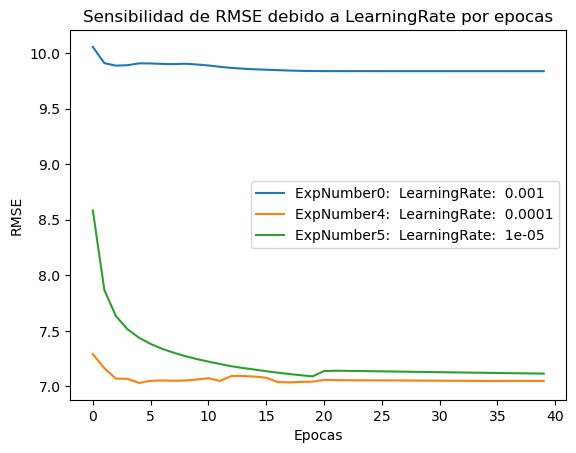

In [246]:
fig,ax = plt.subplots()
for exp,hip in zip(df_plot.columns,df_final[parametro_interes].values):
    ax.plot(df_plot.index,df_plot[exp],label=exp+':  '+ parametro_interes +':  ' +str(hip))

ax.set_title(f'Sensibilidad de RMSE debido a {parametro_interes} por epocas')
ax.legend()
ax.set_xlabel('Epocas')
ax.set_ylabel('RMSE')

In [245]:
help(ax.legend)

Help on method legend in module matplotlib.axes._axes:

legend(*args, **kwargs) method of matplotlib.axes._axes.Axes instance
    Place a legend on the Axes.
    
    Call signatures::
    
        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)
    
    The call signatures correspond to the following different ways to use
    this method:
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()
    
    .. note::
        Specifi